In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchtsmixer import TSMixer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from src.training import train_tsmixer,train_latent_tsmixer

#add a path to the system path
import sys
sys.path.append('../')
from experiments.datasets import *

seed=42
torch.manual_seed(seed)

In [2]:
sequence_length = 40
prediction_length = 20
input_channels = 1
n_samples=100
n_timesteps=sequence_length+prediction_length

#generate a Sine dataset
Dataset_generator=SineDataset_extended(n_samples=n_samples, n_timesteps=n_timesteps)
X,ts,ys=Dataset_generator.get_X_ts_ys()

Ys=np.array(ys)
X_torch=torch.tensor(Ys[:,:sequence_length]).float().reshape(n_samples,sequence_length,1)
Y_torch=torch.tensor(Ys[:,sequence_length:]).float().reshape(n_samples,prediction_length,1)
print(X_torch.shape,Y_torch.shape)

torch.Size([100, 40, 1]) torch.Size([100, 20, 1])


Epoch [10/200]: Train Loss: 0.4151, Val Loss: 0.3151
Epoch [20/200]: Train Loss: 0.2445, Val Loss: 0.2109
Epoch [30/200]: Train Loss: 0.1680, Val Loss: 0.1421
Epoch [40/200]: Train Loss: 0.1446, Val Loss: 0.1067
Epoch [50/200]: Train Loss: 0.1199, Val Loss: 0.1038
Epoch [60/200]: Train Loss: 0.1054, Val Loss: 0.0974
Epoch [70/200]: Train Loss: 0.0841, Val Loss: 0.0806
Epoch [80/200]: Train Loss: 0.0885, Val Loss: 0.0729
Epoch [90/200]: Train Loss: 0.0973, Val Loss: 0.0657
Epoch [100/200]: Train Loss: 0.1385, Val Loss: 0.0563
Epoch [110/200]: Train Loss: 0.0676, Val Loss: 0.0485
Epoch [120/200]: Train Loss: 0.0846, Val Loss: 0.0442
Epoch [130/200]: Train Loss: 0.0868, Val Loss: 0.0338
Epoch [140/200]: Train Loss: 0.0813, Val Loss: 0.0310
Epoch [150/200]: Train Loss: 0.0382, Val Loss: 0.0311
Epoch [160/200]: Train Loss: 0.0777, Val Loss: 0.0289
Epoch [170/200]: Train Loss: 0.1054, Val Loss: 0.0277
Epoch [180/200]: Train Loss: 0.0519, Val Loss: 0.0259
Epoch [190/200]: Train Loss: 0.0756, 

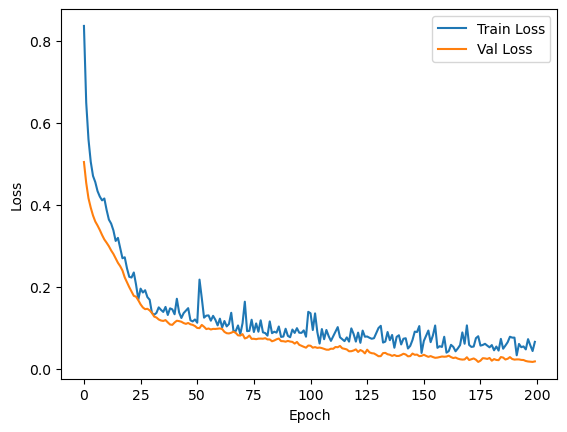

In [3]:
model= TSMixer(
    sequence_length=sequence_length,
    prediction_length=prediction_length,
    input_channels=input_channels,
)

best_model, curves, test_loss,test_dataset  = train_tsmixer(
    model,
    X_torch,
    Y_torch,
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15,
    epochs=200,
    batch_size=16,
    lr=1e-3,
    device="cpu"  # or "cpu"
)

plt.plot(curves[0], label='Train Loss')
plt.plot(curves[1], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

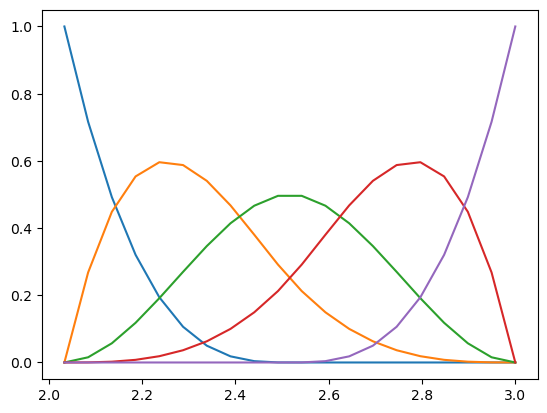

Epoch [10/200]: Train Loss: 0.1414, Val Loss: 0.1021
Epoch [20/200]: Train Loss: 0.1015, Val Loss: 0.0408
Epoch [30/200]: Train Loss: 0.0949, Val Loss: 0.0343
Epoch [40/200]: Train Loss: 0.0741, Val Loss: 0.0245
Epoch [50/200]: Train Loss: 0.1071, Val Loss: 0.0394
Epoch [60/200]: Train Loss: 0.0703, Val Loss: 0.0186
Epoch [70/200]: Train Loss: 0.1354, Val Loss: 0.0141
Epoch [80/200]: Train Loss: 0.0572, Val Loss: 0.0105
Epoch [90/200]: Train Loss: 0.0667, Val Loss: 0.0115
Epoch [100/200]: Train Loss: 0.0399, Val Loss: 0.0078
Epoch [110/200]: Train Loss: 0.0453, Val Loss: 0.0270
Epoch [120/200]: Train Loss: 0.0551, Val Loss: 0.0118
Epoch [130/200]: Train Loss: 0.0423, Val Loss: 0.0134
Epoch [140/200]: Train Loss: 0.0787, Val Loss: 0.0109
Epoch [150/200]: Train Loss: 0.0688, Val Loss: 0.0283
Epoch [160/200]: Train Loss: 0.0351, Val Loss: 0.0132
Epoch [170/200]: Train Loss: 0.0383, Val Loss: 0.0106
Epoch [180/200]: Train Loss: 0.0820, Val Loss: 0.0119
Epoch [190/200]: Train Loss: 0.0886, 

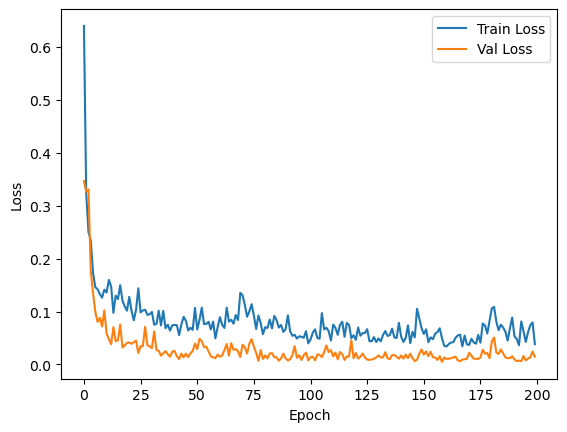

In [ ]:
from timeview.basis import BSplineBasis
B=5
t=ts[0][sequence_length:]
# Flatten all time arrays together

bspline=BSplineBasis(n_basis=B,t_range=(t[0],t[-1]))
Phis = list(bspline.get_all_matrices(np.array(ts)[:,sequence_length:])) # (D, sequence_length, B)

for i in range(B):
    plt.plot(t,Phis[0][:,i])
plt.show()

latent_model = TSMixer(
    sequence_length=sequence_length,   # same as time steps in X
    prediction_length=B, # number of spline coefficients to predict
    input_channels=1,
)

best_latent_model, curves, test_loss,test_dataset = train_latent_tsmixer(
    latent_model,
    X_torch,
    Y_torch,
    Phis,
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15,
    epochs=200,
    batch_size=16,
    lr=0.01,
    device="cpu"  # or "cuda"
)

plt.plot(curves[0], label='Train Loss')
plt.plot(curves[1], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

C:\Users\nicolas.i.fierro\AppData\Local\Temp\ipykernel_25496\2414320877.py:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  y_pred=torch.matmul(torch.Tensor(Phis)[0],h_pred).flatten().detach().numpy()


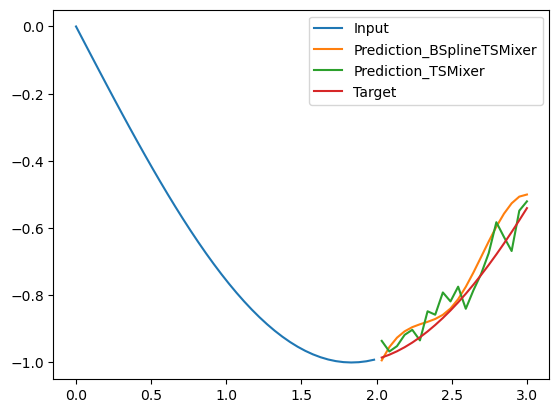

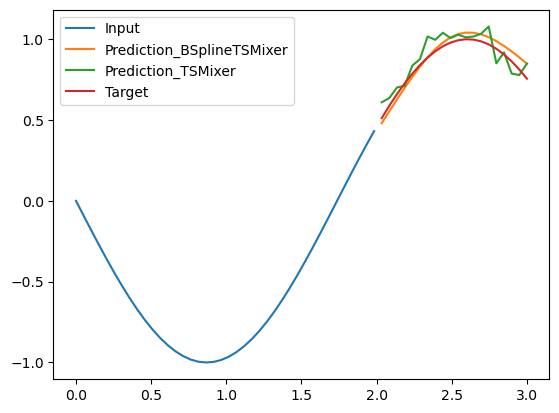

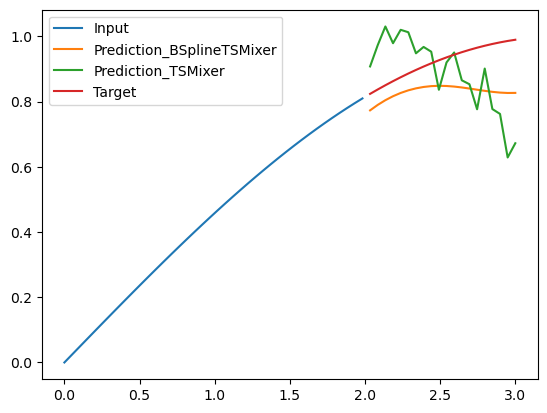

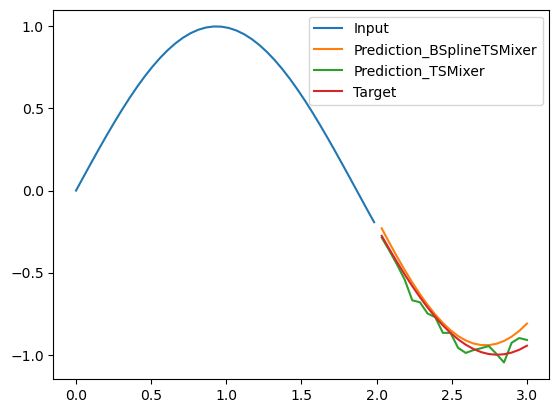

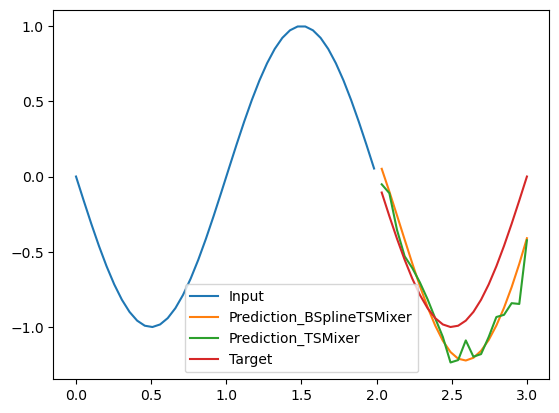

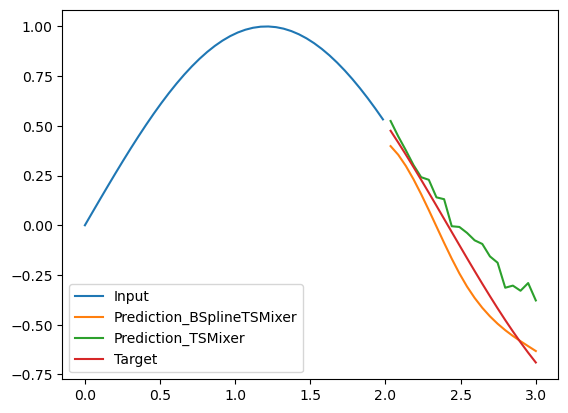

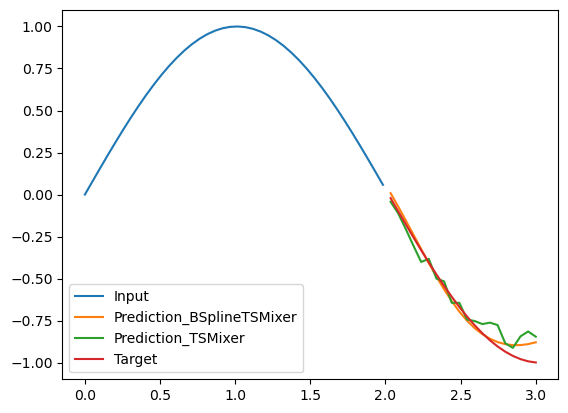

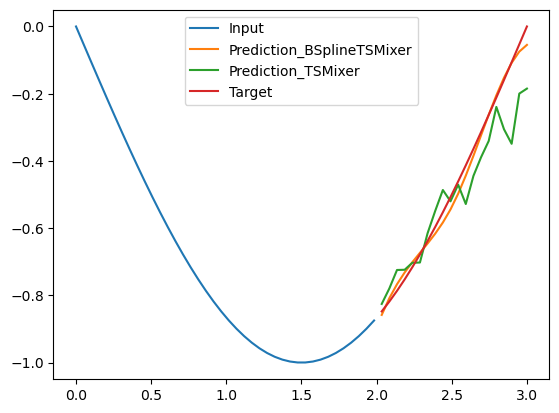

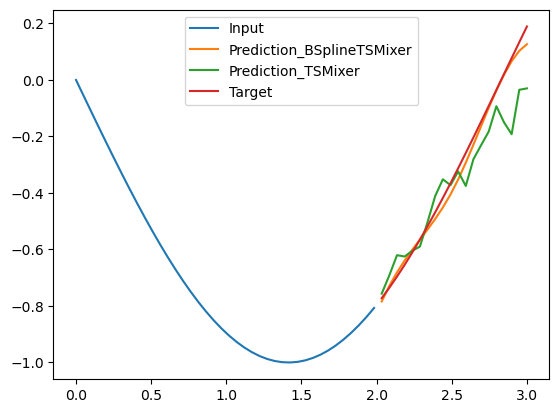

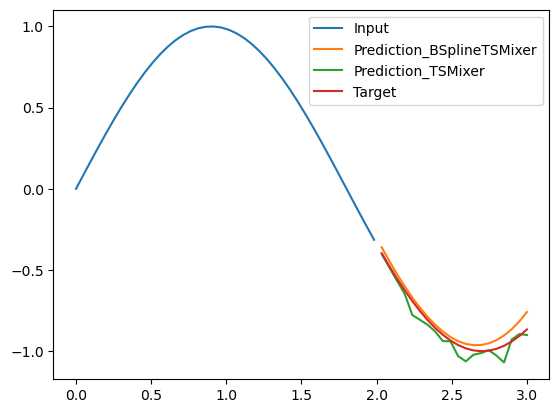

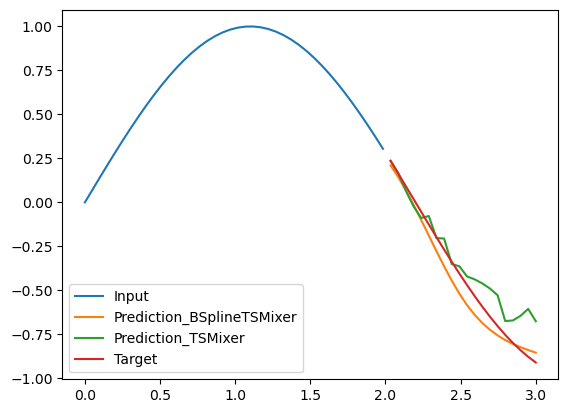

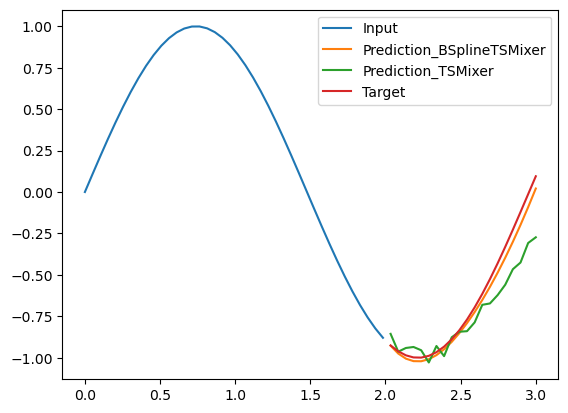

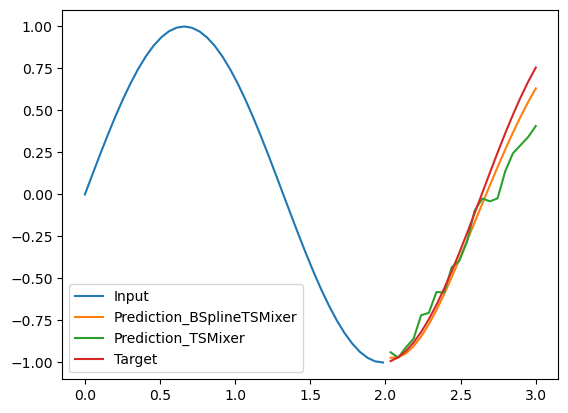

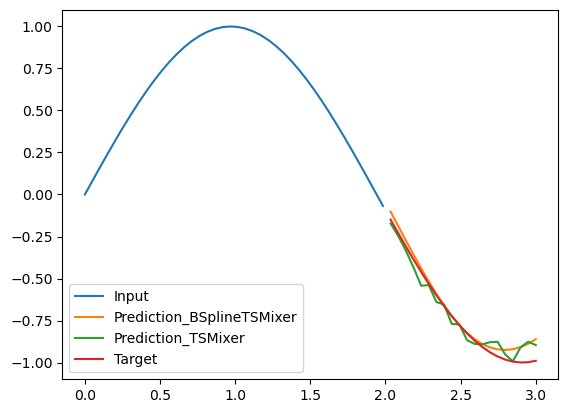

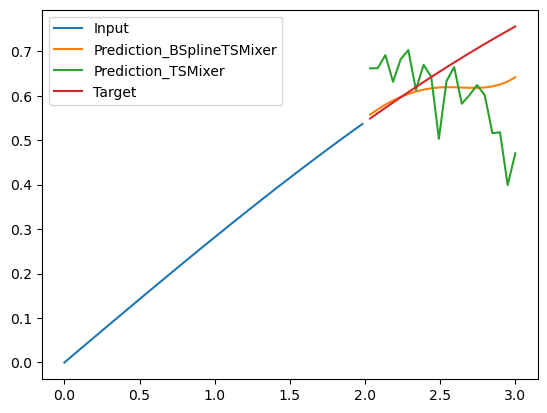

In [5]:
for idx in range(15):
    x_example=test_dataset.__getitem__(idx)[0]
    y_example=test_dataset.__getitem__(idx)[1]

    best_latent_model.eval()
    with torch.no_grad():
        h_pred = latent_model(x_example.unsqueeze(0))
    y_pred=torch.matmul(torch.Tensor(Phis)[0],h_pred).flatten().detach().numpy()

    best_model.eval()
    with torch.no_grad():
        pred = best_model(x_example.unsqueeze(0))

    plt.plot(ts[0][:sequence_length],x_example.squeeze().numpy(), label='Input')
    plt.plot(ts[0][sequence_length:],y_pred,label='Prediction_BSplineTSMixer')
    plt.plot(ts[0][sequence_length:], pred.squeeze().numpy(), label='Prediction_TSMixer')
    plt.plot(ts[0][sequence_length:], y_example.squeeze().numpy(), label='Target')
    plt.legend()
    plt.show()